In [1]:
import numpy as np

In [2]:
hd984b = np.load('hd984b.npy',allow_pickle=True).item()

hd13724b = np.load('hd13724b.npy',allow_pickle=True).item()

In [3]:
hd984b['wave']# / 'spec' / 'err']

array([2.85968447, 2.86036086, 2.86103725, ..., 5.27700758, 5.27767324,
       5.27833891])

In [4]:
import matplotlib.pyplot as plt

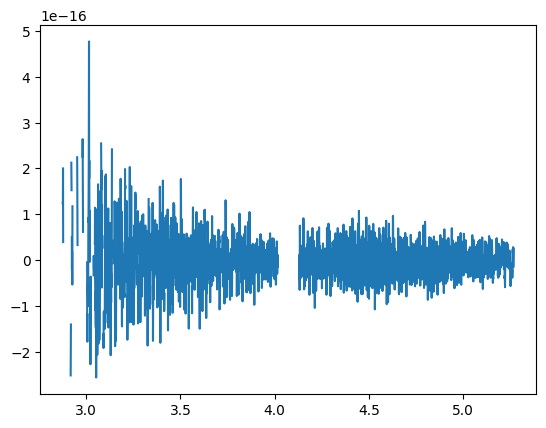

In [5]:
plt.plot(hd984b['wave'], hd984b['spec'])

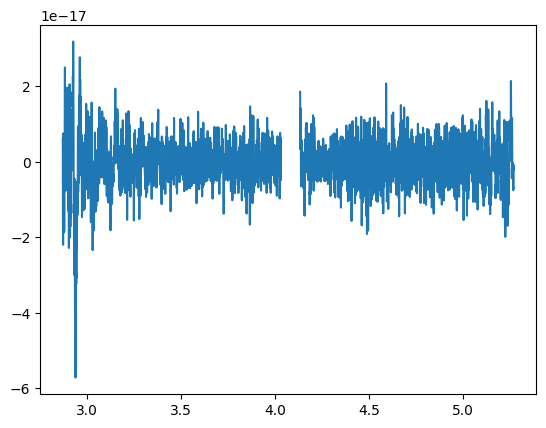

In [6]:
plt.plot(hd13724b['wave'], hd13724b['spec'])

In [13]:
(1/(23.0157/1000))

43.44860247570137

In [7]:
spectrum = np.array([hd13724b['wave'], hd13724b['spec'], hd13724b['err']]).T

In [8]:
cleaned_arr = spectrum[~np.isnan(spectrum).any(axis=1)]

In [9]:
cleaned_arr.shape

(3423, 3)

In [9]:
np.savetxt('hd13724B_nirspec_nonans.txt', cleaned_arr, delimiter='\t')
# np.savetxt('hd984B_nirspec_nonans.txt', cleaned_arr, delimiter='\t')

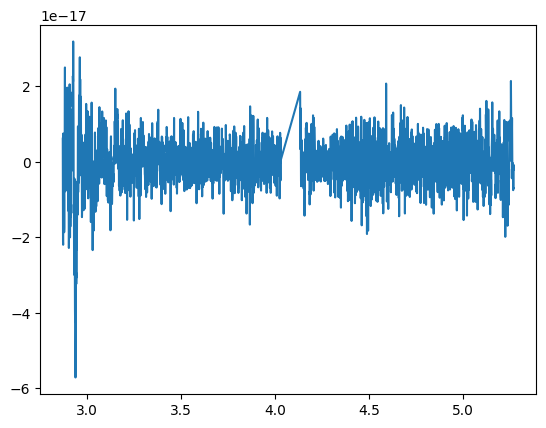

In [10]:
plt.plot(cleaned_arr[:,0], cleaned_arr[:,1])

(-2e-17, 2e-17)

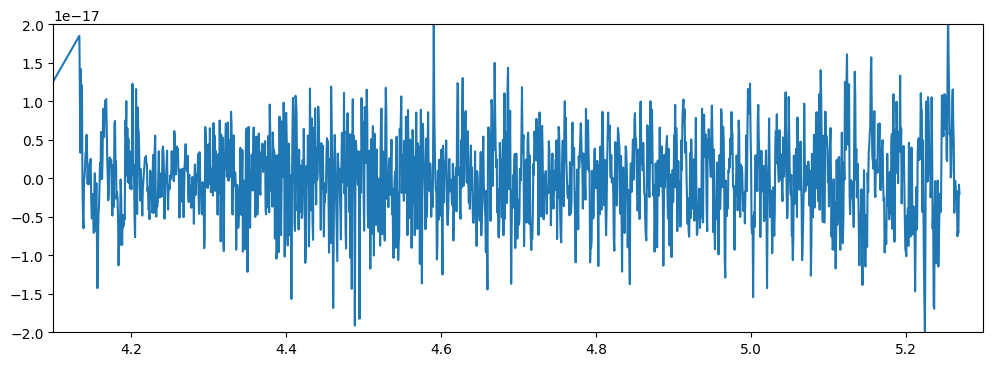

In [11]:
plt.figure(figsize=(12,4))
plt.plot(cleaned_arr[:,0], cleaned_arr[:,1])
plt.xlim(4.1,5.3)
# plt.ylim(-2e-16,2e-16)
plt.ylim(-2e-17,2e-17)

In [12]:
(3750-2500)/(5-3)

625.0

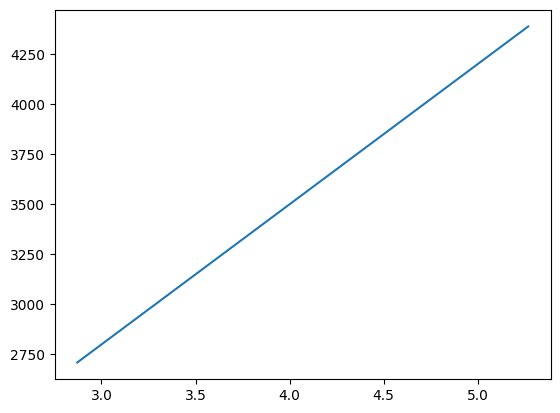

In [13]:
w = cleaned_arr[:,0]
rs = (w*700) + 700

plt.plot(w, rs)

In [14]:
model = './HD13724B_test_bestfit_model_full.npy'

prt = np.load(model)

In [49]:
model = './evaluate_HD984B_test/model_spec_best_fit_NIRSPEC_G395H_HPF.dat'

prt = np.loadtxt(model)

In [16]:
from spectres import spectres
from breads.utils import filter_spec_with_spline

In [32]:
(10**(-2.76))/(10**(-4.77))

102.32929922807537

In [17]:
rebin_flux = spectres(cleaned_arr[:,0], prt[:,0], prt[:,1])

In [18]:
x_nodes = np.linspace(cleaned_arr[0,0], cleaned_arr[-1,0], 60)
hpf,_ = filter_spec_with_spline(cleaned_arr[:,0],rebin_flux,x_nodes=x_nodes)

(-2e-17, 2e-17)

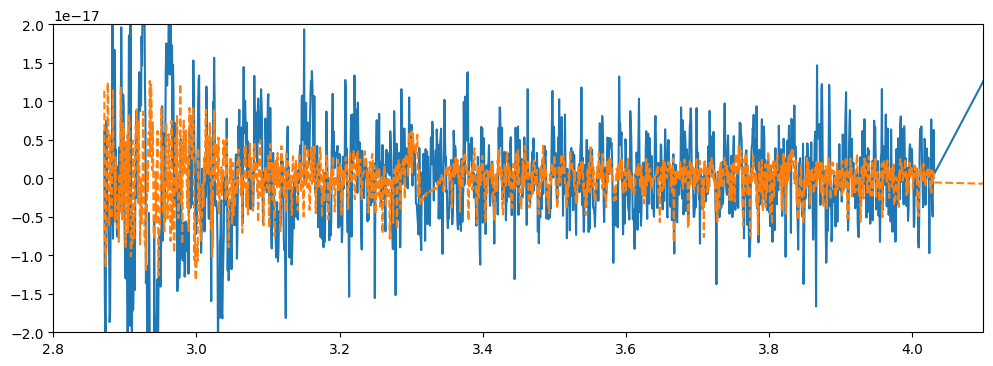

In [24]:
plt.figure(figsize=(12,4))
plt.plot(cleaned_arr[:,0], cleaned_arr[:,1])
plt.plot(cleaned_arr[:,0], hpf, ls='--')
plt.xlim(2.8,4.1)
plt.ylim(-2e-17,2e-17)

(-2e-17, 2e-17)

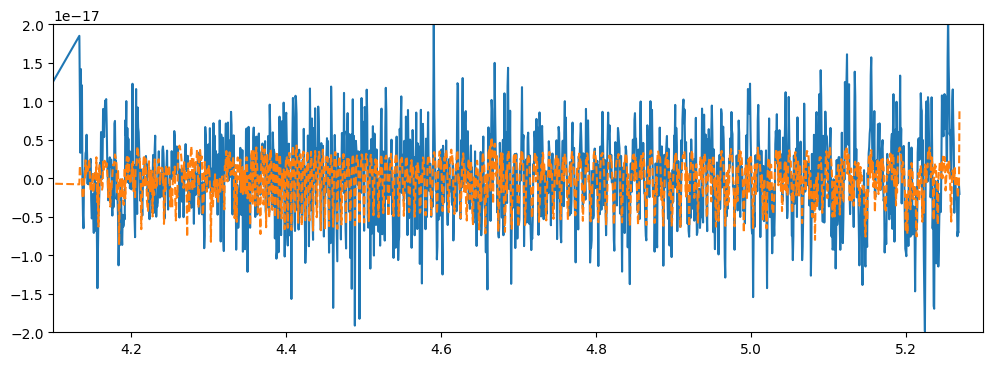

In [23]:
plt.figure(figsize=(12,4))
plt.plot(cleaned_arr[:,0], cleaned_arr[:,1])
plt.plot(cleaned_arr[:,0], hpf, ls='--')
plt.xlim(4.1,5.3)
plt.ylim(-2e-17,2e-17)

(-2e-17, 2e-17)

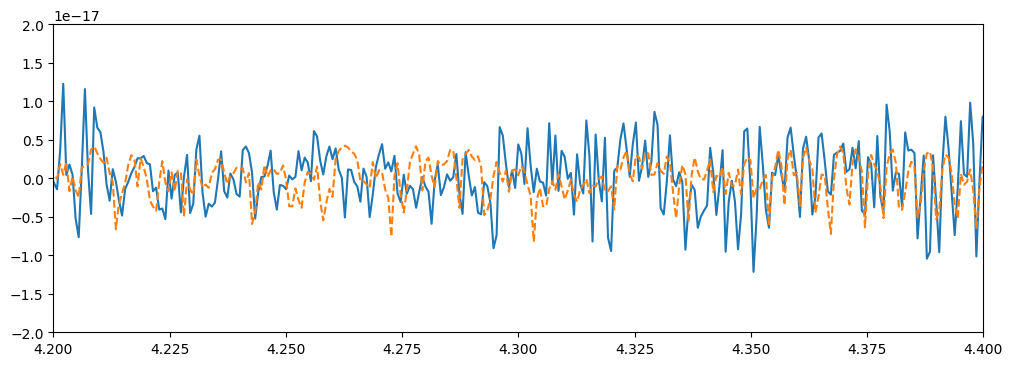

In [22]:
plt.figure(figsize=(12,4))
plt.plot(cleaned_arr[:,0], cleaned_arr[:,1])
plt.plot(cleaned_arr[:,0], hpf, ls='--')
plt.xlim(4.2,4.4)
plt.ylim(-2e-17,2e-17)

In [25]:
from scipy.signal import correlate

In [26]:
corr = correlate(cleaned_arr[:,1], hpf, mode='same')

In [27]:
wavel_shift = self.best_fit_parameters[data.name + "_radvel"].value * 1e1 * self.best_fit_spectra[name][0] / cst.c # i think this is in cm



NameError: name 'self' is not defined

In [29]:
from astropy.constants import c
import astropy.units as u

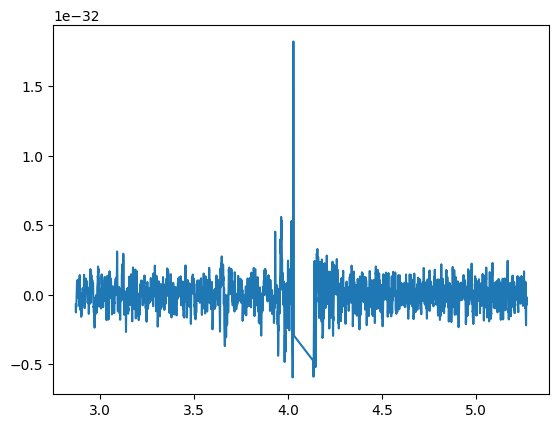

In [31]:
plt.plot(cleaned_arr[:,0], corr)
# plt.xlim(4.2, 4.25)

In [21]:
import pandas as pd

In [52]:
sph = pd.read_csv('HD13724B.rdb', skiprows=3, delim_whitespace=True, names=['w','wb','f','fe','inst','mode'])

In [53]:
sph2 = sph[sph['wb']<0.005]

In [54]:
sph2 = sph2.drop(['inst','mode'], axis=1)

In [55]:
sph2.to_csv('hd13724B_sphere.txt', sep='\t', index=False, header=False)

In [45]:
sph_p = sph[sph['wb']>0.005]

In [47]:
sph_p = sph_p.drop(['inst','mode'], axis=1)

In [56]:
w1 = sph_p['w']-sph_p['wb']
w2 = sph_p['w']+sph_p['wb']

In [60]:
sph_p['w'] = w1
sph_p['wb'] = w2

In [64]:
sph_p = sph_p[['name','w','wb','f','fe']]

In [66]:
# sph_p['name'] = ['Paranal/SPHERE.IRDIS_D_J23_2', 'Paranal/SPHERE.IRDIS_D_J23_3', 'Paranal/SPHERE.IRDIS_D_H23_3', 'Paranal/SPHERE.IRDIS_D_H34_4', 'Paranal/SPHERE.IRDIS_D_K12_1', 'Paranal/SPHERE.IRDIS_D_K12_2']

sph_p.to_csv('hd13724B_sphere_phot.txt', index=False, header=False)